In [1]:
%matplotlib inline
from pathlib import Path
import numpy as np
import os
import scipy.optimize
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
#import nemplot
import openpyxl as ex
from scipy.optimize import minimize
from collections import Counter
import collections
import sklearn
from joblib import dump, load

import matplotlib.pyplot as plt

plt.rc('text',usetex = True)
plt.rc('font', family='serif',size = 12)

In [2]:
#Importa os modelos de regressão / fitting. Mudar o interior da função Path() para onde foi colocado o arquivo
#Para fazer as predições, basta fazer modelo_cunha_default.predict(X) por exemplo

#modelo_cunha_default é o modelo 'clássico', apenas com os parâmetros primários e sem subsegmentos.
#A entrada X é da forma np.array([R2,R3,R4,h_fc,L_mag,phi]), nessa ordem. Retorna o respectivo B, calculado como a 
#média de B de 0 a 22.5º no meio do gap.

#modelo_cunha_default = load(Path("F:\\GitHub\\magnet3D-polomag\\results") / 'modelo_cunha_otimo.joblib')

modelo_cunha_default = load(Path(r"C:\Users\Guilherme\Documents\GitHub\Jupyter\Codemig\Luis") / 'modelo_cunha_otimo.joblib')

#modelo_sub_seg corresponde ao fitting utilizando os subsegmentos compostos de ferro,
#representados por R_m_x (x é o segmento). A entrada é a razão do segmento base que continua ímã. 
#Exemplo: Se Tínhamos um R3 = 100 e um R4= 200, e dividimos de forma que R_m_1 = 175 (portanto, de 100 a 175 temos ímã
# e de 175 a 200 temos aço), temos que a entrada de R_m_1 nesse modelo será 0.75 - ((R_m_1{valor absoluto}-R3)/(R4-R3))
# A saída do modelo é a razão entre o campo obtido e o campo base (com todos R_m =1, ou seja, sem adição de ferro.)
# Em teoria seria entre 0 e 1, porém pelas imprecisões numéricas da simulação e de fitting, obtemos alguns valores 
#ligeiramente maiores, porém desprezíveis.

#modelo_sub_seg = load(Path("F:\\GitHub\\magnet3D-polomag\\results") / 'modelo_sub_seg.joblib') 

modelo_sub_seg = load(Path(r"C:\Users\Guilherme\Documents\GitHub\Jupyter\Codemig\Luis") / 'modelo_sub_seg.joblib') 

C:\Users\Guilherme\Anaconda3\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator StandardScaler from version 0.21.2 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Guilherme\Anaconda3\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator PolynomialFeatures from version 0.21.2 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Guilherme\Anaconda3\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator Ridge from version 0.21.2 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Guilherme\Anaconda3\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator Pipeline from version 0.21.2 when using version 0.21.3. This might lead to breaking code or invalid results. 

array([1.31188965])

In [4]:
#Calcula a massa a partir de um array de R_m_x na forma de razões ((R_m_1{valor absoluto}-R3)/(R4-R3)). 
#Portanto, R_m_x varia de 0 a 1

def mass (R_M,*args):
    #Modelo base
    V_magnet = 0
    densidade = 7500
    L = 160
    R3,R4, phi = args
    for i in R_M:
        RM = i*(R4-R3)+R3
        V_magnet += np.pi*(RM**2-R3**2)*((phi/5)/90)*L
    Mag_mass = V_magnet*1e-9*densidade
    return Mag_mass


#Calcula massa a partir de uma entrada R_m_x em valor absoluto.
#Portanto, variando de R3 a R4
def fullmass (R_M,*args):
    #Modelo base
    V_magnet = 0
    densidade = 7500
    L = 160
    R3,R4, phi = args
    for i in R_M:
        V_magnet += np.pi*(i**2-R3**2)*((phi/5)/90)*L
    Mag_mass = V_magnet*1e-9*densidade
    return Mag_mass

In [5]:
#Define a restrição de campo. lim é um valor de 0 a 1 que indica o valor mínimo de campo, em razão do valor 
#inicial de campo (valor sem substituição de ímã)
#Exemplo: lim=0.95 implica que queremos casos apenas onde o campo cai no máximo 5% do valor base.
def restriction_B(X,lim):
    return lim - modelo_sub_seg.predict(X)
    

In [6]:
R3 = 180
R4 = 350
phi = 40
lim= 0.99



y = minimize(mass,1*np.ones(5),args=(R3,R4,phi),constraints=constraints,bounds=bounds,options={'disp': True})

#calcula os valores de R_m que minimizam a massa. Retorna na forma de razões do segmento (R_m entre 0 e 1)
y #Os R_m ótimos estão armazenados como array em y.x   

NameError: name 'constraints' is not defined

In [7]:
y.fun #Valor da massa mínima

NameError: name 'y' is not defined

In [8]:
y.x #entrada que minimiza a massa para a restrição dada

NameError: name 'y' is not defined

In [9]:
modelo_sub_seg.predict(np.array([y.x]))

NameError: name 'y' is not defined

In [10]:
#Valores absolutos de R_m.
y.x*(R4-R3)+R3

NameError: name 'y' is not defined

Lim = np.zeros(5)
Mass = np.zeros(5)

In [11]:
B[i]

NameError: name 'B' is not defined

In [12]:
R3 = 180
#R4 = 350
phi = 40

R4 = np.arange(201,402,20)
lim = np.arange(0.85,0.99,0.03)
B_o = np.zeros(len(R4))

B = np.zeros([len(B_o),len(lim)])
m = np.zeros([len(B_o),len(lim)])

bounds = [(0, 1) for i in range(0, 5)] #Indica que os valores R_m_x variam de 0 a 1

for i in range(len(R4)):
    X = np.array([[150,200,R4[i],40,200,40]])
    B_o[i] = modelo_cunha_default.predict(X)
    for j in range(len(lim)):
        
        constraints = [{"type": "ineq",
                "fun": lambda x:  -restriction_B(np.array([x]),lim[j])}] #impõe a limitação de campo
        
        y = minimize(mass,1*np.ones(5),args=(R3,R4[i],phi),constraints=constraints,bounds=bounds,options={'disp': True})
        B[i,j] = B_o[i]*lim[j]
        m[i,j] = y.fun
        

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6.624159460358778
            Iterations: 17
            Function evaluations: 130
            Gradient evaluations: 17
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.406416005005924
            Iterations: 18
            Function evaluations: 136
            Gradient evaluations: 18
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8.283957520865902
            Iterations: 10
            Function evaluations: 77
            Gradient evaluations: 10
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.299200881058148
            Iterations: 12
            Function evaluations: 89
            Gradient evaluations: 12
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 10.540313758478641
            Iterations: 11
            Function 

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 80.41677750988718
            Iterations: 21
            Function evaluations: 157
            Gradient evaluations: 21
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 91.50860465752754
            Iterations: 12
            Function evaluations: 90
            Gradient evaluations: 12
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 104.8443240181041
            Iterations: 14
            Function evaluations: 104
            Gradient evaluations: 14
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 121.86745672988961
            Iterations: 14
            Function evaluations: 104
            Gradient evaluations: 14
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 80.60009215984027
            Iterations: 18
            Function

In [282]:
B[0]/max(B[0]),m[0]

(array([0.87628866, 0.90721649, 0.93814433, 0.96907216, 1.        ]),
 array([ 6.62415946,  7.40641601,  8.28395752,  9.29920088, 10.54031376]))

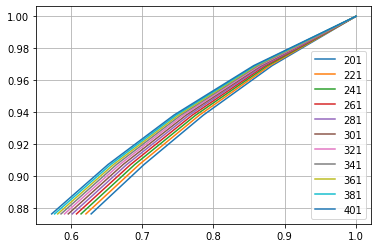

In [283]:
for i in range(len(R4)):
    plt.plot(m[i]/max(m[i]),B[i]/max(B[i]),label = str(R4[i]))
plt.legend()
plt.grid()

In [284]:
m_mag = np.zeros(len(R4))
B_p = np.zeros(len(R4))
m_mag[0] = np.pi*(R4[0]**2 - R3**2)*200*7500*10**-9
B_p[0] = B_o[0] 
for i in range(1,len(R4)):
    m_mag[i] = np.pi*(R4[i]**2 - R4[i-1]**2)*200*7500*10**-9
    B_p[i] = B_o[i] - B_o[i-1]


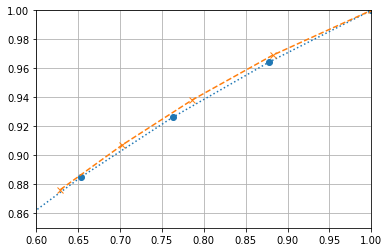

In [295]:
plt.plot((R4**2-R3**2)/(max(R4)**2-R3**2),B_o/max(B_o),'o:')
plt.plot(m[0]/max(m[0]),B[0]/max(B[0]),'x--')
plt.xlim(0.6,1)
plt.ylim(0.85,1)
plt.grid()

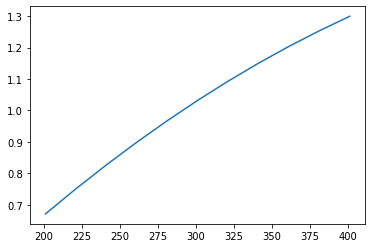

In [286]:
plt.plot(R4,B_o)

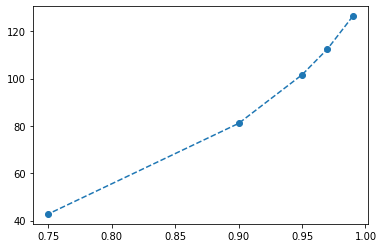

In [287]:
plt.plot(Lim,Mass,'--o')

In [319]:
m_fr

array([ 20,  60, 100])

In [346]:
m_fr = np.arange(20,100,1)
m_fr = [20,60,100]
A = np.pi*(22.4/1000)**2/4
v = m_fr/3600/A/1000
dp = 500*10**-6
mu = 0.8*10**-3
Epsilon = 0.29
dP_29 = (150*mu*(1-Epsilon)**2*v/(dp**2*Epsilon**3) + 1.75*1000*(1-Epsilon)*v**2/(dp*Epsilon**3))*0.05

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [347]:
m_exp = np.array([20,60,100])
v_exp = m_exp/3600/A/1000
dP_exp = np.array([0.08,0.3,0.6])

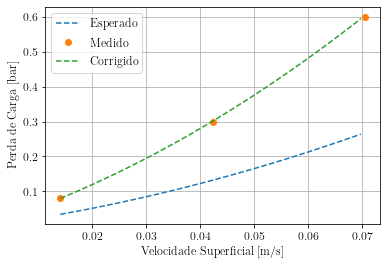

In [363]:
plt.plot(v,dP_36/10**5,'--', label = 'Esperado')
plt.plot(v_exp,dP_exp,'o', label = 'Medido')
plt.plot(v,dP_29/10**5,'--', label = 'Corrigido')
plt.legend()
plt.xlabel('Velocidade Superficial [m/s]')
plt.ylabel('Perda de Carga [bar]')
plt.grid()

plt.savefig('Perda de Carga.png',format = 'png', dpi=500,bbox_inches='tight')